In [1]:
import pandas as pd
data = pd.read_csv('donnees_nettoyees.csv', sep=";")
print(type(data))

print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
             X            Y  OBJECTID     src_geo              clc_quartier  \
0  1720320.108  8294619.356         1  Orthophoto  Quartier du Centre-Ville   
1  1720898.301  8293531.134         2  Orthophoto  Quartier du Centre-Ville   
2  1720893.840  8293542.450         3  Orthophoto  Quartier du Centre-Ville   
3  1720901.650  8293545.467         4  Orthophoto  Quartier du Centre-Ville   
4  1721089.065  8293619.339         5  Orthophoto  Quartier du Centre-Ville   

           clc_secteur  haut_tot  haut_tronc  tronc_diam fk_arb_etat  ...  \
0  Boulevard Richelieu       0.0         0.0         0.0    SUPPRIME  ...   
1  Boulevard Leon Blum       0.0         0.0         0.0      ABATTU  ...   
2  Boulevard Leon Blum       0.0         0.0         0.0    SUPPRIME  ...   
3  Boulevard Leon Blum       0.0         0.0         0.0    SUPPRIME  ...   
4  Boulevard Leon Blum       0.0         0.0         0.0      ABATTU  ...   

  dte_plantation age_est

In [2]:
from map import createDiscreteMap

createDiscreteMap(data, "fk_arb_etat", "trees_by_type", 
                  values = ["SUPPRIME", "ABATTU", "EN PLACE", "Non essouche", "Essouche", "REMPLACE"], 
                  labels = ["SUPPRIME", "ABATTU", "EN PLACE", "Non essouche", "Essouche", "REMPLACE"], 
                  colors = ["gray", "red", "green", "orange", "black", "blue"]
                  )


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = pd.read_csv('donnees_nettoyees.csv', sep=";")
print(type(data))




# Remplacer les 0 par NaN, puis supprimer les lignes inexploitables
data[['haut_tot', 'haut_tronc', 'tronc_diam']] = data[['haut_tot', 'haut_tronc', 'tronc_diam']].replace(0, pd.NA)
df_clean = data.dropna(subset=['haut_tot', 'haut_tronc', 'tronc_diam'])

# Features nettoyés
features = df_clean[['haut_tot', 'haut_tronc', 'tronc_diam']]

print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
             X            Y  OBJECTID     src_geo              clc_quartier  \
0  1720320.108  8294619.356         1  Orthophoto  Quartier du Centre-Ville   
1  1720898.301  8293531.134         2  Orthophoto  Quartier du Centre-Ville   
2  1720893.840  8293542.450         3  Orthophoto  Quartier du Centre-Ville   
3  1720901.650  8293545.467         4  Orthophoto  Quartier du Centre-Ville   
4  1721089.065  8293619.339         5  Orthophoto  Quartier du Centre-Ville   

           clc_secteur haut_tot haut_tronc tronc_diam fk_arb_etat  ...  \
0  Boulevard Richelieu     <NA>       <NA>       <NA>    SUPPRIME  ...   
1  Boulevard Leon Blum     <NA>       <NA>       <NA>      ABATTU  ...   
2  Boulevard Leon Blum     <NA>       <NA>       <NA>    SUPPRIME  ...   
3  Boulevard Leon Blum     <NA>       <NA>       <NA>    SUPPRIME  ...   
4  Boulevard Leon Blum     <NA>       <NA>       <NA>      ABATTU  ...   

  dte_plantation age_estim fk_prec_estim c

In [8]:
from map import createContinuousMap

createContinuousMap(df_clean, "haut_tronc", "haut_tronc", 0, max(df_clean.haut_tronc), colors = ["yellow", "blue"])

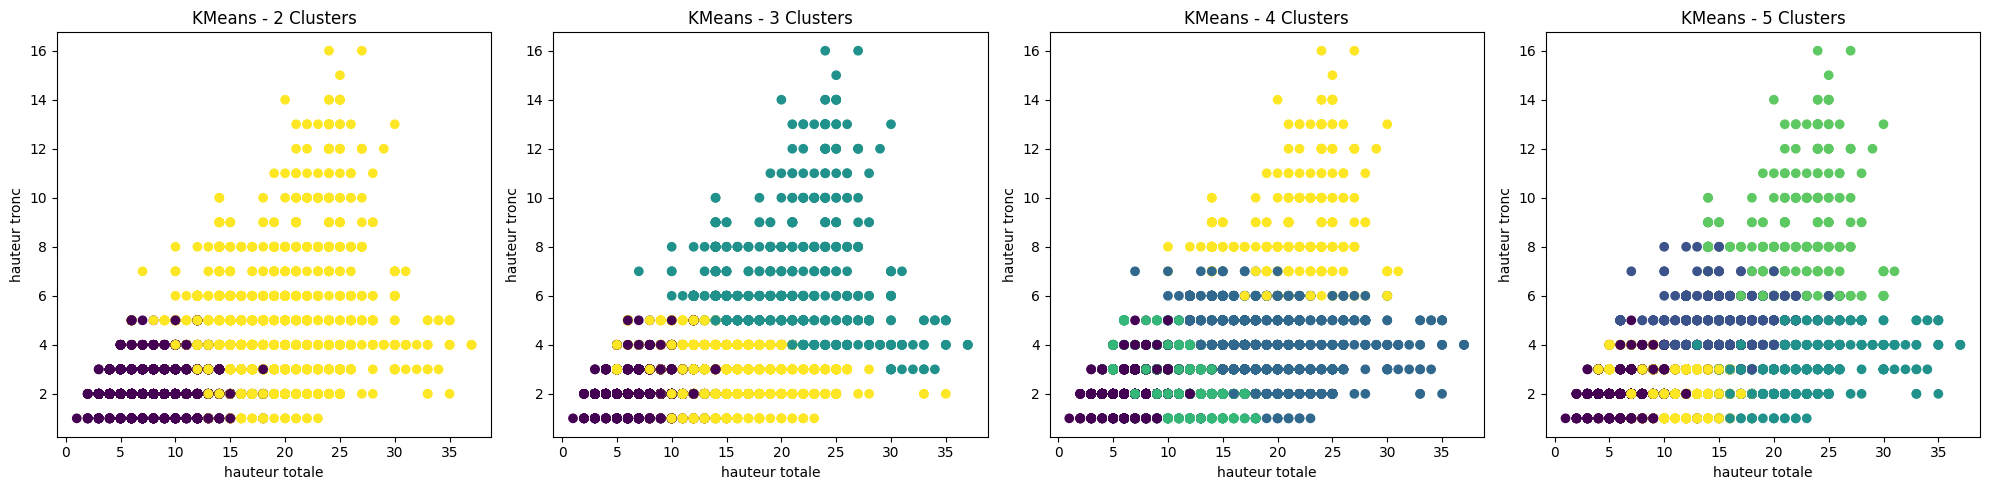

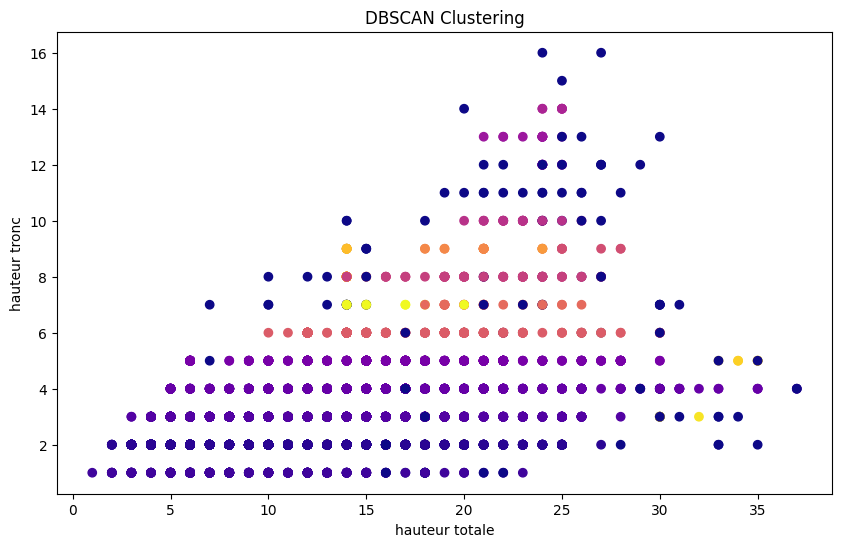

In [5]:
# Normalisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Clustering avec KMeans (tester de 2 à 5 clusters)
kmeans_results = {}
for n_clusters in range(2, 6):  # Tester de 2 à 5 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    kmeans_results[n_clusters] = kmeans.labels_

# Affichage des résultats de KMeans
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()
for i, n_clusters in enumerate(kmeans_results.keys()):
    ax = axes[i]
    ax.scatter(df_clean['haut_tot'], df_clean['haut_tronc'], c=kmeans_results[n_clusters], cmap='viridis')
    ax.set_title(f'KMeans - {n_clusters} Clusters')
    ax.set_xlabel('hauteur totale')
    ax.set_ylabel('hauteur tronc')

plt.tight_layout()
plt.show()

# Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Affichage des résultats de DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['haut_tot'], df_clean['haut_tronc'], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('hauteur totale')
plt.ylabel('hauteur tronc')
plt.show()

In [7]:
import plotly.graph_objects as go

# Scatter3D points
scatter = go.Scatter3d(
    mode="markers",
    name="y",
    x=data['haut_tot'],
    y=data['haut_tronc'],
    z=data['tronc_diam'],
    marker=dict(size=2, color=["blue" if cluster == 0 else "yellow" if cluster == 1 else "red" for cluster in kmeans_results[3]])
)

# Layout
layout = go.Layout(
    title='3D Point Clustering',
    scene=dict(
        xaxis=dict(title='Hauteur Totale', zeroline=False),
        yaxis=dict(title='Hauteur du tronc', zeroline=False),
        zaxis=dict(title='Diametre du tronc', zeroline=False)
    )
)

# Combine and show
fig = go.Figure(data=[scatter], layout=layout)
fig.to_html()
fig.show()